In [ ]:
# mount my Google Drive on the VM

from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
#
# Setup
#

import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

pd.set_option('display.max_columns', None)

In [ ]:
#
# Read the csv file containing block data
#

# where the data file is located
DIR_DATA = "/gdrive/MyDrive/Classroom/UE05 FinTech M2 Finance FIT 2023-2024/data/bitcoin-blocks"

bk = pd.read_csv(os.path.join(DIR_DATA, 'blocks_for_FIT_satoshis.csv'),
                 parse_dates=['time'],
                 nrows=None) # use a number instead of None to read only a few lines

#display(bk.dtypes)
bk

,time,height,revenue,fee,tx_count,base_size,input_count,input_value,output_count,output_value,protocol_block_reward,difficulty
0,2009-01-03 18:15:05,0,5000000000,0,1,285,0,0,1,5000000000,5000000000,1.000000e+00
1,2009-01-09 02:54:25,1,5000000000,0,1,215,0,0,1,5000000000,5000000000,1.000000e+00
2,2009-01-09 02:55:44,2,5000000000,0,1,215,0,0,1,5000000000,5000000000,1.000000e+00
3,2009-01-09 03:02:53,3,5000000000,0,1,215,0,0,1,5000000000,5000000000,1.000000e+00
4,2009-01-09 03:16:28,4,5000000000,0,1,215,0,0,1,5000000000,5000000000,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
665563,2021-01-11 10:11:04,665563,656240436,31240436,2368,954366,5876,118095570100,5233,118720570100,625000000,2.060742e+13
665564,2021-01-11 10:27:46,665564,726671095,101671095,1707,735837,6301,2019902415800,5054,2020527415800,625000000,2.060742e+13
665565,2021-01-11 10:36:23,665565,713357849,88357849,2014,759280,6195,3297905805352,5796,3298530805352,625000000,2.060742e+13
665566,2021-01-11 10:41:24,665566,681664764,56664764,2688,900664,6425,357817001468,6082,358442001468,625000000,2.060742e+13


In [ ]:
bk['fee_a'] = bk['fee']/100000000

In [ ]:
# Function to calculate the distance to 210000 and its multiples
def calculate_distance(number):
    base_value = 210000
    return abs(number - (base_value)*(1+number//base_value)) if number!=(base_value)*(number//base_value) else 210000

bk['Next_Halving'] = bk['height'].apply(calculate_distance)
bk['Next_Halving'][0] = 210000

<ipython-input-5-a4bc6c7cf7cb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bk['Next_Halving'][0] = 210000


In [ ]:
bk['fee_lag'] = bk['fee'].shift()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

def plot_acf(data, lags=40):
    # Calculate ACF
    acf_result = sm.tsa.acf(data, nlags=lags)

    # Plot ACF
    plt.figure(figsize=(10, 6))
    plt.stem(range(lags + 1), acf_result, use_line_collection=True)
    plt.title('Autocorrelation Function (ACF)')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

<ipython-input-9-6750eb5bbb7a>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(lags + 1), acf_result, use_line_collection=True)


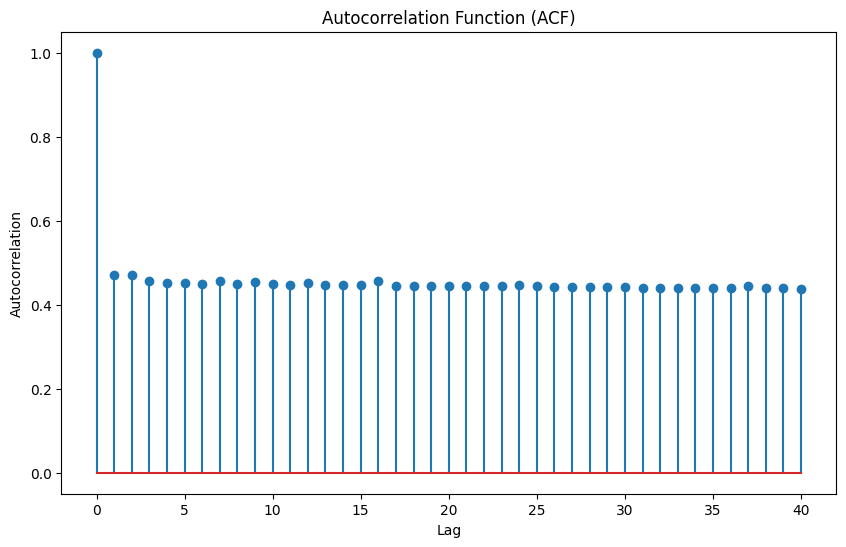

In [ ]:
plot_acf(bk['fee'])

In [ ]:

def plot_pacf(data, lags=40):
    # Calculate PACF
    pacf_result = sm.tsa.pacf(data, nlags=lags, method='ols')

    # Plot PACF
    plt.figure(figsize=(10, 6))
    plt.stem(range(lags + 1), pacf_result, use_line_collection=True)
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.show()

<ipython-input-11-ac8a7e9ac039>:7: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(lags + 1), pacf_result, use_line_collection=True)


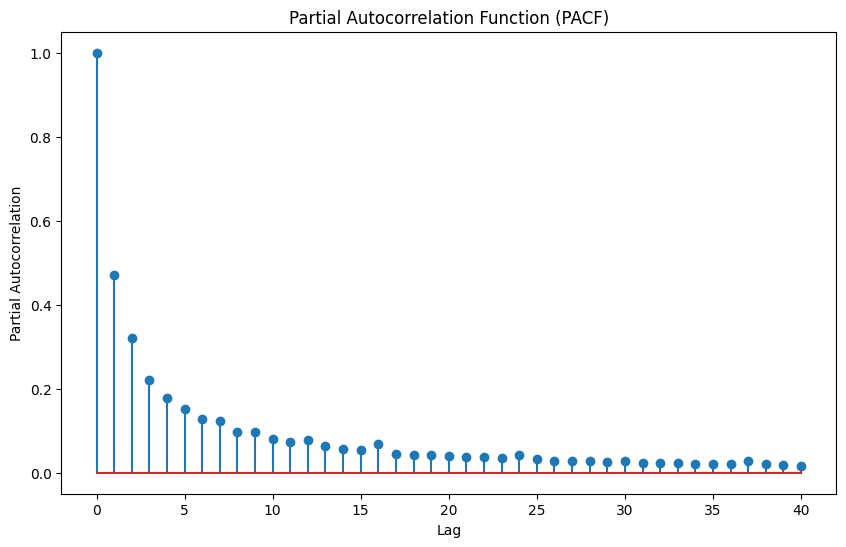

In [ ]:
plot_pacf(bk['fee'])

In [ ]:
pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.0 MB/s eta 0:00:00


<function matplotlib.pyplot.show(close=None, block=None)>

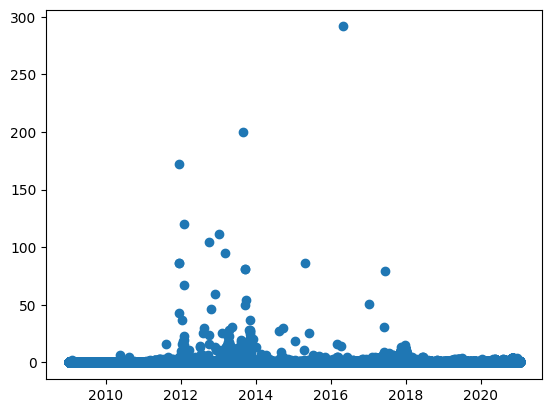

In [ ]:
plt.scatter(bk['time'],bk['fee_a'])
plt.show

In [ ]:
reduced = bk[bk['fee']<1500000000]

In [ ]:
bk[bk['fee'].isin(bk['fee'].nlargest(20))].sort_values(by = 'fee')

,time,height,revenue,fee,tx_count,base_size,input_count,input_value,output_count,output_value,protocol_block_reward,difficulty,fee_a,Next_Halving
157114,2011-12-11 19:28:02,157114,9296671516,4296671516,39,31206,156,217146043227,75,222146043227,5000000000,1.090716e+06,42.966715,52886
203662,2012-10-17 06:08:37,203662,9611470000,4611470000,823,415910,1868,2348217412520,2177,2353217412520,5000000000,3.072322e+06,46.114700,6338
258555,2013-09-17 22:53:23,258555,7517993477,5017993477,428,249028,1364,371743643491,870,374243643491,2500000000,1.126285e+08,50.179935,161445
446633,2017-01-04 20:01:28,446633,6353767145,5103767145,2415,998143,4284,2871705387827,5641,2872955387827,1250000000,3.176884e+11,51.037671,183367
260343,2013-09-27 04:07:08,260343,7908455165,5408455165,220,111589,566,219115395021,541,221615395021,2500000000,1.488192e+08,54.084552,159657
209782,2012-11-27 07:17:17,209782,10900334758,5900334758,184,59609,277,1800813673186,356,1805813673186,5000000000,3.438909e+06,59.003348,218
164382,2012-01-29 13:16:59,164382,11752500000,6752500000,39,14895,66,95362096717,74,100362096717,5000000000,1.307728e+06,67.525000,45618
470189,2017-06-07 12:30:48,470189,9215735309,7965735309,1475,998225,4053,597296173463,3929,598546173463,1250000000,6.787601e+11,79.657353,159811
258562,2013-09-17 23:42:17,258562,10615901183,8115901183,615,248566,1195,333259504190,1333,335759504190,2500000000,1.126285e+08,81.159012,161438
258546,2013-09-17 21:23:26,258546,10631862532,8131862532,457,325286,1786,192174846863,1249,194674846863,2500000000,1.126285e+08,81.318625,161454


In [ ]:
reduced = reduced[reduced['fee']>1000]

In [ ]:
plt.scatter(reduced['time'],reduced['fee_a'])
plt.show

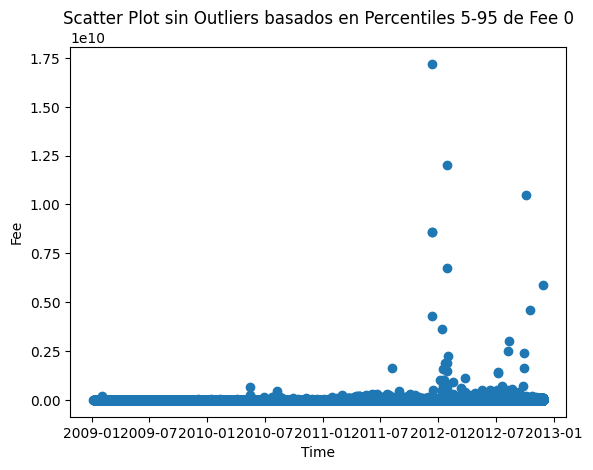

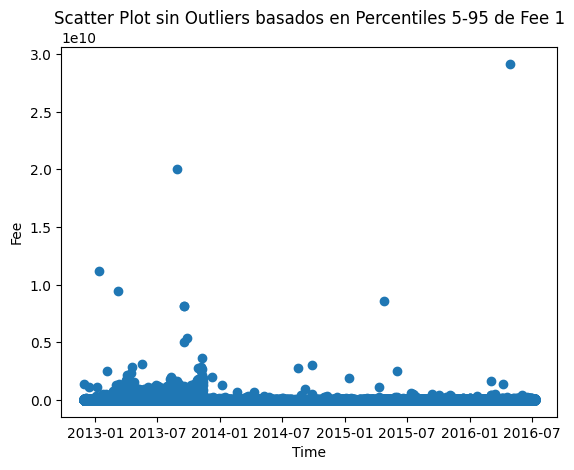

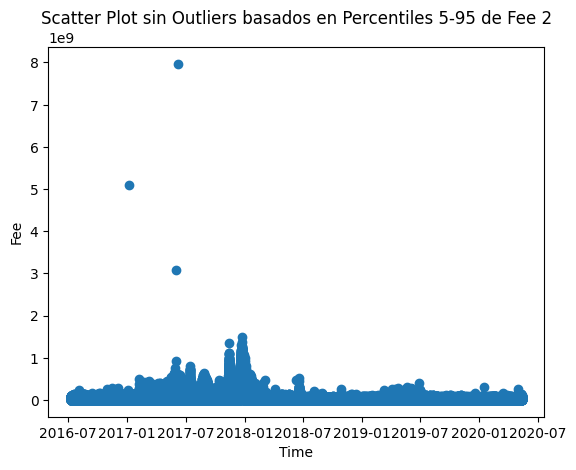

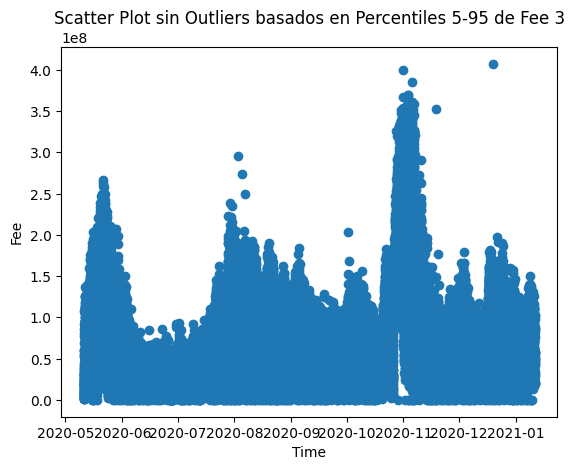

In [ ]:
import pandas as pd

split_dates = ["2012-11-28", "2016-07-09", "2020-05-11"]

# Convert split_dates to datetime objects
split_dates = pd.to_datetime(split_dates)

# Ensure split_dates are sorted in ascending order
split_dates = sorted(split_dates)

# Create bins using IntervalIndex
bins = pd.IntervalIndex.from_tuples([(pd.to_datetime('1900-01-01'), split_dates[0])] +
                                    [(split_dates[i], split_dates[i + 1]) for i in range(len(split_dates) - 1)] +
                                    [(split_dates[-1], pd.to_datetime('2100-01-01'))])

# Create labels for each date range
bk['date_range'] = pd.cut(bk['time'], bins=bins, labels=False)

# Split the DataFrame based on the date ranges
split_dataframes = [group for _, group in bk.groupby('date_range')]

# Example of usage
for i, bk in enumerate(split_dataframes):
  plt.scatter(bk['time'], bk['fee'])
  plt.xlabel('Time')
  plt.ylabel('Fee')
  plt.title(f'Scatter Plot sin Outliers basados en Percentiles 5-95 de Fee {i}')
  plt.show()


In [ ]:
bk_day = bk.groupby(bk['time'].dt.date)['fee_a'].mean()

In [ ]:
plt.scatter(bk_day.index,bk_day.values)

<ipython-input-12-b4fe3d2f20af>:21: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  subset_data = daily_avg_grouped.loc[start_date:end_date]


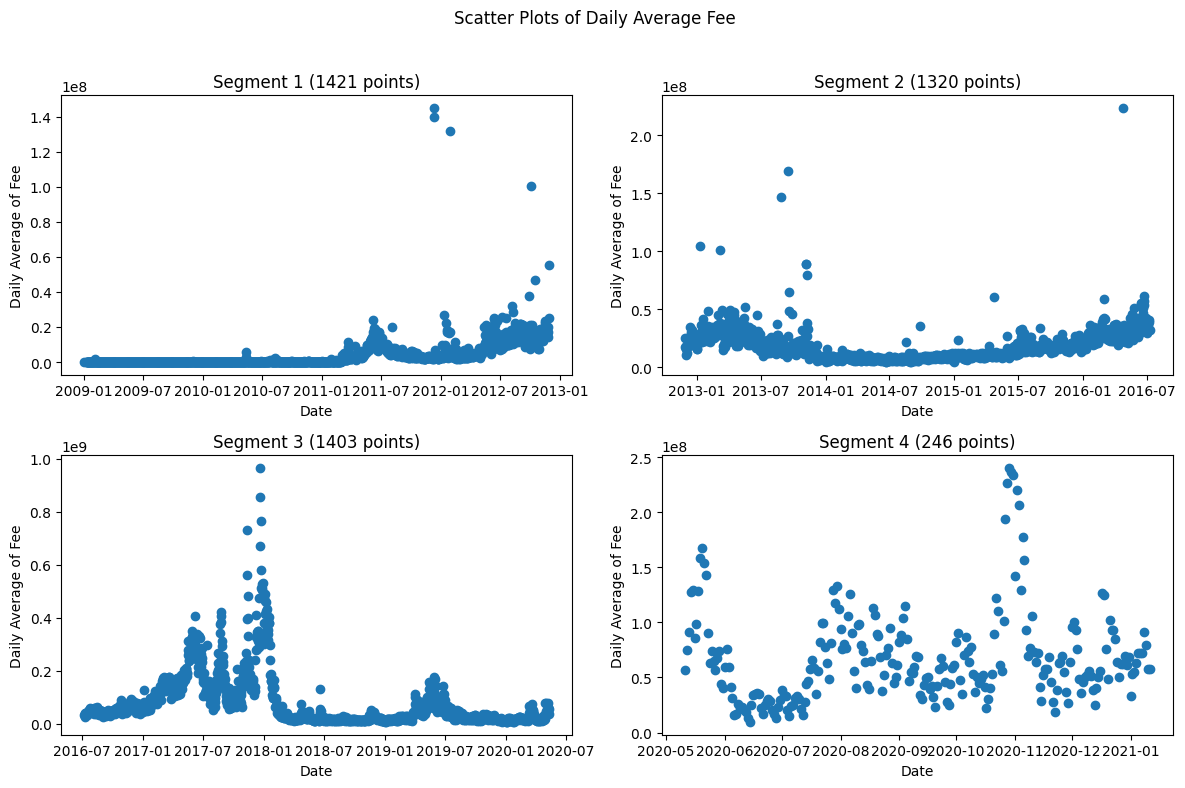

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming bk is your DataFrame and 'time' is the datetime column
# Make sure the 'time' column is in datetime format
bk['time'] = pd.to_datetime(bk['time'])

# Group by the daily average of 'fee'
daily_avg_grouped = bk.groupby(bk['time'].dt.date)['fee'].mean()

# Updated split dates
split_dates = ["2009-01-03", "2012-11-28", "2016-07-09", "2020-05-11"]

# Create four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Scatter Plots of Daily Average Fee')

for i, ax in enumerate(axs.flatten()):
    start_date = pd.to_datetime(split_dates[i])
    end_date = pd.to_datetime(split_dates[i + 1]) if i + 1 < len(split_dates) else daily_avg_grouped.index[-1]
    subset_data = daily_avg_grouped.loc[start_date:end_date]

    ax.scatter(subset_data.index, subset_data.values)
    num_data_points = len(subset_data)
    ax.set_title(f'Segment {i + 1} ({num_data_points} points)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Average of Fee')
    #ax.set_ylim(0, 3)  # Set y-axis limit to a maximum of 4

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()




In [ ]:
pip install arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 6.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import scipy.stats as sc
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.arima.model as tsa
from statsmodels.tsa.stattools import adfuller
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
import tensorflow as tf
from pmdarima.arima import auto_arima

In [ ]:
bk['fee_a'].describe()

count    665568.000000
mean          0.351339
std           0.992043
min           0.000000
25%           0.010553
50%           0.097749
75%           0.330000
max         291.532751
Name: fee_a, dtype: float64

In [ ]:
am = auto_arima(bk['fee'], start_p=0, d=0, start_Q=0, max_p=0, max_q=3, max_d=0, start_P=0, D=0, start_q=0, max_Q=0, max_D=0, max_P=0, m=1, seasonal=False, error_action='warn', trace= True, supress_warnings=True, stepwise=True, random_state=20, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=26477243.830, Time=12.80 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=26357699.475, Time=21.49 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=26301818.196, Time=38.65 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=26273585.069, Time=48.53 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=26230902.096, Time=95.82 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=26255533.653, Time=82.36 sec

Best model:  ARIMA(0,0,3)(0,0,0)[0] intercept
Total fit time: 299.699 seconds


Yt = Yt-1 + Yt-2 + Yt-3 + e

In [ ]:
modelo= tsa.ARIMA(bk['fee'], order=(0,0,3))
modelo_fit= modelo.fit()

print(modelo_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                    fee   No. Observations:               665568
Model:                 ARIMA(0, 0, 3)   Log Likelihood           -13114536.909
Date:                Mon, 13 Nov 2023   AIC                       26229083.817
Time:                        19:28:18   BIC                       26229140.859
Sample:                             0   HQIC                      26229099.776
                             - 665568                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.513e+07   2.35e-15   1.49e+22      0.000    3.51e+07    3.51e+07
ma.L1          0.2929   3.11e-05   9432.457      0.000       0.293       0.293
ma.L2          0.2654   4.88e-05   5441.726      0.0

In [ ]:
bk['diff']=bk['fee'].diff()

In [ ]:
modelo= tsa.ARIMA(bk['diff'], order=(0,0,3))
modelo_fit= modelo.fit()

print(modelo_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   diff   No. Observations:               665568
Model:                 ARIMA(0, 0, 3)   Log Likelihood           -13009077.125
Date:                Mon, 13 Nov 2023   AIC                       26018164.251
Time:                        19:38:51   BIC                       26018221.293
Sample:                             0   HQIC                      26018180.209
                             - 665568                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.0903   3.57e-13   8.72e+13      0.000      31.090      31.090
ma.L1         -0.9386   9.16e-05  -1.02e+04      0.000      -0.939      -0.938
ma.L2          0.0016      0.000     13.642      0.0

 Y_t = Y_{t-1} + NextHalving + e

In [ ]:
# Assuming 'fee' is the dependent variable and 'NextHalving' is an independent variable
model_data = bk[['fee', 'Next_Halving']].copy()

# Shift the 'fee' column to get Y_{t-1}
model_data['fee_lag'] = model_data['fee'].shift()

# Drop NaN values resulting from the shift
model_data = model_data.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag', 'Next_Halving']]))
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                 9.706e+04
Date:                Mon, 13 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:01:48   Log-Likelihood:            -1.3114e+07
No. Observations:              665567   AIC:                         2.623e+07
Df Residuals:                  665564   BIC:                         2.623e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7.591e+06   2.17e+05     34.915   

Delta Transaction Fee (Yt - Yt-1 = Ht + e)

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Assuming 'fee' is the dependent variable and 'NextHalving' is an independent variable
model_data = bk[['fee', 'Next_Halving']].copy()

# Shift the 'fee' column to get Y_{t-1}
model_data['fee_lag'] = model_data['fee'].shift()

# Create a new column representing the difference Y_t - Y_{t-1}
model_data['fee_diff'] = model_data['fee'] - model_data['fee_lag']

# Drop NaN values resulting from the shift
model_data = model_data.dropna()

# Fit the model (Y_t - Y_{t-1}) = NextHalving + e
model = sm.OLS(model_data['fee_diff'], sm.add_constant(model_data[['Next_Halving']]))
results = model.fit()

# Print regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:               fee_diff   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                  0.003164
Date:                Mon, 13 Nov 2023   Prob (F-statistic):              0.955
Time:                        20:04:03   Log-Likelihood:            -1.3218e+07
No. Observations:              665567   AIC:                         2.644e+07
Df Residuals:                  665565   BIC:                         2.644e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.244e+04   2.54e+05      0.049   

TO DO:

- Separate data in 4 segments and do all
- Same for regressions
- plot diff Bethas so we are able to find the best possible time frame
- look for examples while doing diffs


First Segment

In [ ]:
Halv1 = bk[bk['height']<210000]

In [ ]:
plot_acf(Halv1['fee'])

In [ ]:
plot_pacf(Halv1['fee'])

In [ ]:
# Assuming 'fee' is the dependent variable and 'NextHalving' is an independent variable
model_data = Halv1[['fee', 'Next_Halving']].copy()

# Shift the 'fee' column to get Y_{t-1}
model_data['fee_lag'] = model_data['fee'].shift()
Halv1['fee_lag'] = Halv1['fee'].shift()

# Drop NaN values resulting from the shift
model_data = model_data.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag', 'Next_Halving']]))
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     718.0
Date:                Thu, 16 Nov 2023   Prob (F-statistic):          1.65e-311
Time:                        08:52:48   Log-Likelihood:            -4.0781e+06
No. Observations:              209999   AIC:                         8.156e+06
Df Residuals:                  209996   BIC:                         8.156e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.172e+07   2.88e+05     40.685   

<ipython-input-17-0a440761da34>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Halv1['fee_lag'] = Halv1['fee'].shift()


Dataframe of bethas

In [ ]:
FL = pd.DataFrame(columns=['Obs', 'betha_lag', 'betha_H'])

for i in np.arange(0,432):
  model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag', 'Next_Halving']]))
  results = model.fit()
  FL.loc[i]= [ results.nobs, results.params[1], results.params[2]]
  model_data = model_data.iloc[:-1]

#results.params[1] #Fee lag betha
#results.nobs

In [ ]:
plt.plot(FL['Obs'],FL['betha_lag'])

In [ ]:
plt.plot(FL['Obs'],FL['betha_H'])

Finding the height for big betha change

In [ ]:
FL[(FL['Obs'] > 209750) & (FL['Obs'] < 209800)]

Diferentiation in between Estimation and Event

In [ ]:
Halv1_Estimation = Halv1[Halv1['height']<=209781]
#Halv1_Estimation = Halv1_Estimation[Halv1_Estimation['fee']>0]
Halv1_Event = bk[(bk['height']>209781) & (bk['height']<=210219)]
Halv1_Pre_Event = bk[(bk['height']>209781) & (bk['height']<210000)]
Halv1_Post_Event = bk[(bk['height']>=210000) & (bk['height']<210219)]
Halv1_Post_Estimation = bk[(bk['height']>=210219) & (bk['height']<210219+5000)]

Estimation process

In [ ]:
# Shift the 'fee' column to get Y_{t-1}
Halv1_Estimation['fee_lag'] = Halv1_Estimation['fee'].shift()

# Drop NaN values resulting from the shift
Halv1_Estimation = Halv1_Estimation.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model_E = sm.OLS(Halv1_Estimation['fee'], sm.add_constant(Halv1_Estimation[['fee_lag', 'Next_Halving']]))
results_E = model_E.fit()

# Print regression results
print(results_E.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     136.0
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.04e-59
Time:                        11:59:11   Log-Likelihood:            -1.7871e+06
No. Observations:               90159   AIC:                         3.574e+06
Df Residuals:                   90156   BIC:                         3.574e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          1.43e+07    6.4e+05     22.347   

In [ ]:
Halv_Estimated = Halv1_Estimation[['height','fee']]

In [ ]:
Halv_Estimated.loc[209782]=[209782,results_E.params[0] + results_E.params[1] * Halv1_Event['fee_lag'].iloc[0] + results_E.params[2] * Halv1_Event['Next_Halving'].iloc[0]]

<ipython-input-159-d5b30226abcc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Halv_Estimated.loc[209782]=[209782,results_E.params[0] + results_E.params[1] * Halv1_Event['fee_lag'].iloc[0] + results_E.params[2] * Halv1_Event['Next_Halving'].iloc[0]]


In [ ]:
for i in np.arange(1, Halv1_Event.shape[0]):
  Halv_Estimated.loc[209782+i]=[209782+i,results_E.params[0] + results_E.params[1] * Halv_Estimated.loc[209781+i]['fee'] + results_E.params[2] * Halv1_Event['Next_Halving'].iloc[i]]

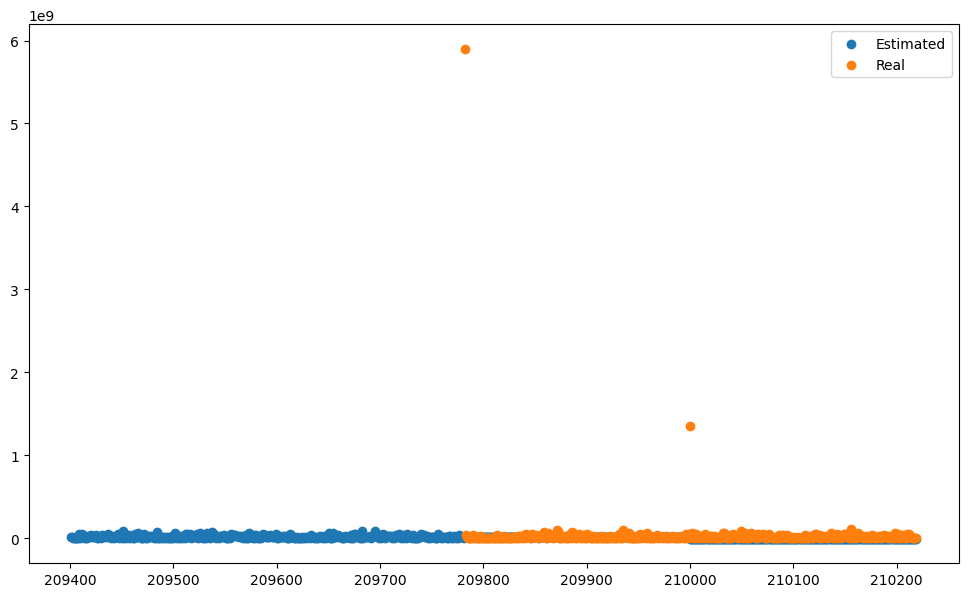

In [ ]:
Halv_Estimated_reduc = Halv_Estimated[Halv_Estimated['height']>209400]
plt.figure(figsize=(12, 7))
plt.scatter(Halv_Estimated_reduc['height'], Halv_Estimated_reduc['fee'], label = 'Estimated')
plt.scatter(Halv1_Event['height'], Halv1_Event['fee'], label = 'Real')
plt.legend()


In [ ]:
test = results_E.params[0] + results_E.params[1] * Halv1_Event['fee_lag'].iloc[0] + results_E.params[2] * Halv1_Event['Next_Halving'].iloc[0]

11655513.938634913

ARMA(0,1)

In [ ]:
# Assuming 'fee' is the dependent variable and 'NextHalving' is an independent variable
model_data = Halv1[['fee', 'Next_Halving']].copy()

# Shift the 'fee' column to get Y_{t-1}
model_data['fee_lag'] = model_data['fee'].shift()
Halv1['fee_lag'] = Halv1['fee'].shift()

# Drop NaN values resulting from the shift
model_data = model_data.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag']]))
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     488.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          4.58e-108
Time:                        13:54:45   Log-Likelihood:            -4.0786e+06
No. Observations:              209999   AIC:                         8.157e+06
Df Residuals:                  209997   BIC:                         8.157e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.042e+06   1.44e+05     28.068      0.0

<ipython-input-164-9e4d96269901>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Halv1['fee_lag'] = Halv1['fee'].shift()


In [ ]:
FL = pd.DataFrame(columns=['Obs', 'betha_lag'])

for i in np.arange(0,432):
  model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag']]))
  results = model.fit()
  FL.loc[i]= [ results.nobs, results.params[1]]
  model_data = model_data.iloc[:-1]


In [ ]:
plt.plot(FL['Obs'],FL['betha_lag'])

In [ ]:
# Shift the 'fee' column to get Y_{t-1}
Halv1_Estimation['fee_lag'] = Halv1_Estimation['fee'].shift()

# Drop NaN values resulting from the shift
Halv1_Estimation = Halv1_Estimation.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model_E = sm.OLS(Halv1_Estimation['fee'], sm.add_constant(Halv1_Estimation[['fee_lag']]))
results_E = model_E.fit()

# Print regression results
print(results_E.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     190.1
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.33e-43
Time:                        13:58:13   Log-Likelihood:            -1.7872e+06
No. Observations:               90160   AIC:                         3.574e+06
Df Residuals:                   90158   BIC:                         3.574e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.337e+06   3.29e+05     28.379      0.0

In [ ]:
Halv_Estimated.loc[209782]=[209782,results_E.params[0] + results_E.params[1] * Halv1_Event['fee_lag'].iloc[0]]

In [ ]:
for i in np.arange(1, Halv1_Event.shape[0]):
  Halv_Estimated.loc[209782+i]=[209782+i,results_E.params[0] + results_E.params[1] * Halv_Estimated.loc[209781+i]['fee']]

In [ ]:
Halv_Estimated_reduc = Halv_Estimated[Halv_Estimated['height']>209400]
plt.figure(figsize=(12, 7))
plt.scatter(Halv_Estimated_reduc['height'], Halv_Estimated_reduc['fee'], label = 'Estimated')
plt.scatter(Halv1_Event['height'], Halv1_Event['fee'], label = 'Real')
plt.legend()

In [ ]:
# Create an ARMA model with the given parameters

#time_series_data = arma_process.generate_sample(n_obs) + epsilon

# Fit an ARMA model to the generated data
order = (0, 0, 1)  # (p, q) order of the ARMA model
model = tsa.ARIMA(Halv1_Estimation['fee'], order=(0,0,1))
results = model.fit()

forecast_steps = 100
forecast_values = results.forecast(steps=forecast_steps)

# Create a new index for the forecast
forecast_index = pd.RangeIndex(start=Halv1_Estimation.index[-1] + 1, stop=Halv1_Estimation.index[-1] + forecast_steps + 1)

# Plot the original time series and the forecast
Halv1_Estimation = Halv1_Estimation[Halv1_Estimation['height']>209400]
plt.scatter(Halv1_Estimation['height'],Halv1_Estimation['fee'], label='Original Time Series')
plt.scatter(forecast_index, forecast_values, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

STARTOVER WITH ARMA(0,3)

In [ ]:
modelo= tsa.ARIMA(Halv1['fee'], order=(0,0,3))
modelo_fit= modelo.fit()

print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    fee   No. Observations:               210000
Model:                 ARIMA(0, 0, 3)   Log Likelihood            -4077665.734
Date:                Tue, 14 Nov 2023   AIC                        8155341.467
Time:                        13:39:44   BIC                        8155392.741
Sample:                             0   HQIC                       8155356.526
                             - 210000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.247e+06   5.13e-14   8.28e+19      0.000    4.25e+06    4.25e+06
ma.L1          0.0433      0.000    212.849      0.000       0.043       0.044
ma.L2          0.0964   5.98e-05   1612.156      0.0

Segment 2

In [ ]:
Halv2 = bk[(bk['height']<420000) & (bk['height']>=210220+5000) ]

In [ ]:
plot_acf(Halv2['fee'])

In [ ]:
plot_pacf(Halv2['fee'])

In [ ]:
# Assuming 'fee' is the dependent variable and 'NextHalving' is an independent variable
model_data = Halv2[['fee', 'Next_Halving']].copy()

# Shift the 'fee' column to get Y_{t-1}
model_data['fee_lag'] = model_data['fee'].shift()
Halv2['fee_lag'] = Halv2['fee'].shift()

# Drop NaN values resulting from the shift
model_data = model_data.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag']]))
results = model.fit()

# Print regression results
print(results.summary())

In [ ]:
FL = pd.DataFrame(columns=['Obs', 'betha_lag'])

for i in np.arange(0,8640*2):
  model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag']]))
  results = model.fit()
  FL.loc[i]= [ results.nobs, results.params[1]]
  model_data = model_data.iloc[:-1]

In [ ]:
plt.plot(FL['Obs'],FL['betha_lag'])

In [ ]:
plt.plot(FL[(FL['Obs'] > 198780) & (FL['Obs'] < 198800)]['Obs'],FL[(FL['Obs'] > 198780) & (FL['Obs'] < 198800)]['betha_lag'])

Max Betha at 10991, obs 198788, betha 0.019227

In [ ]:
FL[(FL['Obs'] > 198780) & (FL['Obs'] < 210219)]

In [ ]:
Halv2_Estimation = Halv2[Halv2['height']<=409008]
Halv2_Event = bk[(bk['height']>409008) & (bk['height']<=420000+10992)]
Halv2_Pre_Event = bk[(bk['height']>409008) & (bk['height']<420000)]
Halv2_Post_Event = bk[(bk['height']>=420000) & (bk['height']<420000+10992)]
Halv2_Post_Estimation = bk[(bk['height']>=420000+10992) & (bk['height']<430992+5000)]


Segment 3

In [ ]:
Halv3 = bk[(bk['height']>=430992+5000) & (bk['height']<630000) ]

In [ ]:
plot_acf(Halv3['fee'])

In [ ]:
plot_pacf(Halv3['fee'])

In [ ]:
# Assuming 'fee' is the dependent variable and 'NextHalving' is an independent variable
model_data = Halv3[['fee', 'Next_Halving']].copy()

# Shift the 'fee' column to get Y_{t-1}
model_data['fee_lag'] = model_data['fee'].shift()
Halv3['fee_lag'] = Halv3['fee'].shift()

# Drop NaN values resulting from the shift
model_data = model_data.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag']]))
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                 4.462e+05
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:43:46   Log-Likelihood:            -3.8615e+06
No. Observations:              199007   AIC:                         7.723e+06
Df Residuals:                  199005   BIC:                         7.723e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.342e+07   1.76e+05     76.403      0.0

<ipython-input-20-dffaaeb3338a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Halv3['fee_lag'] = Halv3['fee'].shift()


In [ ]:
FL = pd.DataFrame(columns=['Obs', 'betha_lag'])

for i in np.arange(0,8640*2):
  model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag']]))
  results = model.fit()
  FL.loc[i]= [ results.nobs, results.params[1]]
  model_data = model_data.iloc[:-1]

In [ ]:
plt.plot(FL['Obs'],FL['betha_lag'])

In [ ]:
plt.plot(FL[(FL['Obs'] > 201300) & (FL['Obs'] < 201400)]['Obs'],FL[(FL['Obs'] > 201300) & (FL['Obs'] < 201400)]['betha_lag'])

Max Betha at 8663, obs 201336, betha 0.830038

In [ ]:
FL[(FL['Obs'] > 201320) & (FL['Obs'] < 201342)]

In [ ]:
Halv3_Estimation = Halv3[Halv3['height']<=621336]
Halv3_Event = bk[(bk['height']>621336) & (bk['height']<=638664)]
Halv3_Pre_Event = bk[(bk['height']>621336) & (bk['height']<630000)]
Halv3_Post_Event = bk[(bk['height']>=630000) & (bk['height']<638664)]
Halv3_Post_Estimation = bk[(bk['height']>=638664) & (bk['height']<638664+5000)]

Segment 4

In [ ]:
Halv4 = bk[(bk['height']>=638664+5000) ] #638664

In [ ]:
plot_acf(Halv4['fee'])

In [ ]:
plot_pacf(Halv4['fee'])

In [ ]:
# Assuming 'fee' is the dependent variable and 'NextHalving' is an independent variable
model_data = Halv4[['fee', 'Next_Halving']].copy()

# Shift the 'fee' column to get Y_{t-1}
model_data['fee_lag'] = model_data['fee'].shift()
Halv4['fee_lag'] = Halv4['fee'].shift()

# Drop NaN values resulting from the shift
model_data = model_data.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag']]))
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                 4.031e+04
Date:                Thu, 16 Nov 2023   Prob (F-statistic):               0.00
Time:                        13:18:59   Log-Likelihood:            -6.7008e+05
No. Observations:               35567   AIC:                         1.340e+06
Df Residuals:                   35565   BIC:                         1.340e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.761e+07   3.06e+05     57.527      0.0

<ipython-input-20-643574061075>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Halv4['fee_lag'] = Halv4['fee'].shift()


In [ ]:
FL = pd.DataFrame(columns=['Obs', 'betha_lag'])

for i in np.arange(0,8640*2):
  model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag']]))
  results = model.fit()
  FL.loc[i]= [ results.nobs, results.params[1]]
  model_data = model_data.iloc[:-1]

In [ ]:
plt.plot(FL['Obs'],FL['betha_lag'])

In [ ]:
plt.plot(FL[(FL['Obs'] > 24300) & (FL['Obs'] < 24350)]['betha_lag'])

Min Betha at obs 11232 = 24335 obs, betha = 0.706548

In [ ]:
Halv4_Estimation = Halv4[Halv4['height']<=654335]
Halv4_Event = bk[bk['height']>654335]
Halv4_Pre_Event = bk[bk['height']>654335]


In [ ]:
FL[(FL['Obs'] > 24300) & (FL['Obs'] < 24350)]

In [ ]:
# Assuming 'fee' is the dependent variable and 'NextHalving' is an independent variable
model_data = Halv4_Estimation[['fee', 'fee_lag','height','difficulty','base_size']].copy()

# Shift the 'fee' column to get Y_{t-1}
model_data['fee_lag'] = model_data['fee'].shift()
Halv4_Estimation['fee_lag'] = Halv4_Estimation['fee'].shift()

# Drop NaN values resulting from the shift
model_data = model_data.dropna()

# Fit the model Y_t = Y_{t-1} + NextHalving + e
model = sm.OLS(model_data['fee'], sm.add_constant(model_data[['fee_lag','difficulty','base_size']]))
results = model.fit()

# Print regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    fee   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     8797.
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        10:45:34   Log-Likelihood:            -4.5490e+05
No. Observations:               24335   AIC:                         9.098e+05
Df Residuals:                   24331   BIC:                         9.098e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.473e+07    2.2e+06    -11.258      0.0

<ipython-input-25-dffcd565d6dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Halv4_Estimation['fee_lag'] = Halv4_Estimation['fee'].shift()


In [ ]:
modelo= tsa.ARIMA(Halv4_Estimation['fee'], order=(0,0,3), exog=Halv4_Estimation[['difficulty','base_size']])
modelo_fit= modelo.fit()

print(modelo_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    fee   No. Observations:                24336
Model:                 ARIMA(0, 0, 3)   Log Likelihood             -457043.294
Date:                Fri, 17 Nov 2023   AIC                         914100.589
Time:                        10:48:12   BIC                         914157.287
Sample:                             0   HQIC                        914118.964
                              - 24336                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.567e+07   1.86e-12  -2.99e+19      0.000   -5.57e+07   -5.57e+07
difficulty  2.804e-06   3.45e-08     81.194      0.000    2.74e-06    2.87e-06
base_size     79.3966   2.43e-06   3.27e+07      0.0

In [ ]:
forecast_steps = 20000
exog_forecast = pd.DataFrame({'difficulty': np.random.randn(forecast_steps), 'base_size': np.random.randn(forecast_steps)})  # Replace with your actual exogenous variables
forecast_values = modelo_fit.forecast(steps=forecast_steps, exog=exog_forecast)


# Create a new index for the forecast
forecast_index = pd.RangeIndex(start=Halv4_Estimation.index[-1] + 1, stop=Halv4_Estimation.index[-1] + forecast_steps + 1)

# Plot the original time series and the forecast
#Halv4_Estimation = Halv4_Estimation[Halv4_Estimation['height']>209400]
plt.scatter(Halv4_Estimation['height'],Halv4_Estimation['fee'], label='Original Time Series')
plt.scatter(forecast_index, forecast_values, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

New approach: Yt = MA(3) + Exo(controls) + δA + δB + δC where A, B, and C are dummys of positioning

In [ ]:
#Adding the dummies

# Function to calculate the distance to 210000 and its multiples
def A_dummy(number):
    return 1 if (number in Halv1_Estimation['height']) or (number in Halv2_Estimation['height']) or (number in Halv3_Estimation['height']) or (number in Halv4_Estimation['height'])else 0

def B_dummy(number):
    return 1 if (number in Halv1_Pre_Event['height']) or (number in Halv2_Pre_Event['height']) or (number in Halv3_Pre_Event['height']) or (number in Halv4_Pre_Event['height'])else 0

def C_dummy(number):
    return 1 if (number in Halv1_Post_Event['height']) or (number in Halv2_Post_Event['height']) or (number in Halv3_Post_Event['height']) else 0

bk['A'] = bk['height'].apply(A_dummy)
bk['B'] = bk['height'].apply(B_dummy)
bk['C'] = bk['height'].apply(C_dummy)


In [ ]:
bk['test'] = bk['A']+bk['B'] + bk['C']
#bk[bk['test']==0]

In [ ]:
window1 = pd.concat([Halv1_Estimation,Halv1_Pre_Event, Halv1_Post_Event, Halv1_Post_Estimation])
window2 = pd.concat([Halv2_Estimation,Halv2_Pre_Event, Halv2_Post_Event, Halv2_Post_Estimation])
window3 = pd.concat([Halv3_Estimation,Halv3_Pre_Event, Halv3_Post_Event, Halv3_Post_Estimation])
window4 = pd.concat([Halv4_Estimation,Halv4_Pre_Event])

In [ ]:
modelo= tsa.ARIMA(window1['fee'], order=(0,0,3), exog=window1[['difficulty','base_size','A','B','C']])
modelo_fit= modelo.fit()

print(modelo_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                    fee   No. Observations:               215219
Model:                 ARIMA(0, 0, 3)   Log Likelihood            -4175266.343
Date:                Mon, 20 Nov 2023   AIC                        8350552.686
Time:                        18:18:17   BIC                        8350655.480
Sample:                             0   HQIC                       8350582.845
                             - 215219                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.906e+05   4.13e-06   1.43e+11      0.000    5.91e+05    5.91e+05
difficulty     0.1470      0.140      1.047      0.295      -0.128       0.422
base_size    170.7250      2.173     78.574      0.0

In [ ]:
modelo_fit.t_test([0,0,0,-1,1,0])